# COVID-19 Global Data Tracker

This notebook analyzes COVID-19 trends using data from [Our World in Data](https://ourworldindata.org/coronavirus).  It explores the confirmed cases, deaths, and vaccination trends for Kenya, India, and the United States.


# Importing the necessary libraries and Displaying the descriptive statistics

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "owid-covid-data.csv"
df = pd.read_csv(file_path)

# Display basic info
column_names = df.columns.tolist()
head_rows = df.head()
missing_values_summary = df.isnull().sum().sort_values(ascending=False)

column_names, head_rows, missing_values_summary.head(20)


(['iso_code',
  'continent',
  'location',
  'date',
  'total_cases',
  'new_cases',
  'new_cases_smoothed',
  'total_deaths',
  'new_deaths',
  'new_deaths_smoothed',
  'total_cases_per_million',
  'new_cases_per_million',
  'new_cases_smoothed_per_million',
  'total_deaths_per_million',
  'new_deaths_per_million',
  'new_deaths_smoothed_per_million',
  'reproduction_rate',
  'icu_patients',
  'icu_patients_per_million',
  'hosp_patients',
  'hosp_patients_per_million',
  'weekly_icu_admissions',
  'weekly_icu_admissions_per_million',
  'weekly_hosp_admissions',
  'weekly_hosp_admissions_per_million',
  'total_tests',
  'new_tests',
  'total_tests_per_thousand',
  'new_tests_per_thousand',
  'new_tests_smoothed',
  'new_tests_smoothed_per_thousand',
  'positive_rate',
  'tests_per_case',
  'tests_units',
  'total_vaccinations',
  'people_vaccinated',
  'people_fully_vaccinated',
  'total_boosters',
  'new_vaccinations',
  'new_vaccinations_smoothed',
  'total_vaccinations_per_hundred'

# Step 3: Data Cleaning and pre-processing

In [3]:
# Step 3: Data Cleaning

# Filter for selected countries
countries_of_interest = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()

# Convert 'date' column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Select only necessary columns
columns_of_interest = [
    'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'
]
df_cleaned = df_filtered[columns_of_interest].copy()

# Handle missing numeric values: forward-fill per country
df_cleaned.sort_values(by=['location', 'date'], inplace=True)
df_cleaned.update(df_cleaned.groupby('location').ffill())

# Drop rows where 'total_cases' is still missing after forward-fill (critical metric)
df_cleaned.dropna(subset=['total_cases'], inplace=True)

# Check cleaned structure
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 173549 to 196995
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 3356 non-null   object        
 1   date                     3356 non-null   datetime64[ns]
 2   total_cases              3356 non-null   float64       
 3   new_cases                3356 non-null   float64       
 4   total_deaths             3356 non-null   float64       
 5   new_deaths               3356 non-null   float64       
 6   total_vaccinations       2556 non-null   float64       
 7   people_vaccinated        2556 non-null   float64       
 8   people_fully_vaccinated  2439 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 262.2+ KB


(None,
        location       date  total_cases  new_cases  total_deaths  new_deaths  \
 173549    India 2020-01-05          0.0        0.0           0.0         0.0   
 173550    India 2020-01-06          0.0        0.0           0.0         0.0   
 173551    India 2020-01-07          0.0        0.0           0.0         0.0   
 173552    India 2020-01-08          0.0        0.0           0.0         0.0   
 173553    India 2020-01-09          0.0        0.0           0.0         0.0   
 
         total_vaccinations  people_vaccinated  people_fully_vaccinated  
 173549                 NaN                NaN                      NaN  
 173550                 NaN                NaN                      NaN  
 173551                 NaN                NaN                      NaN  
 173552                 NaN                NaN                      NaN  
 173553                 NaN                NaN                      NaN  )

# 4: Data Visualization

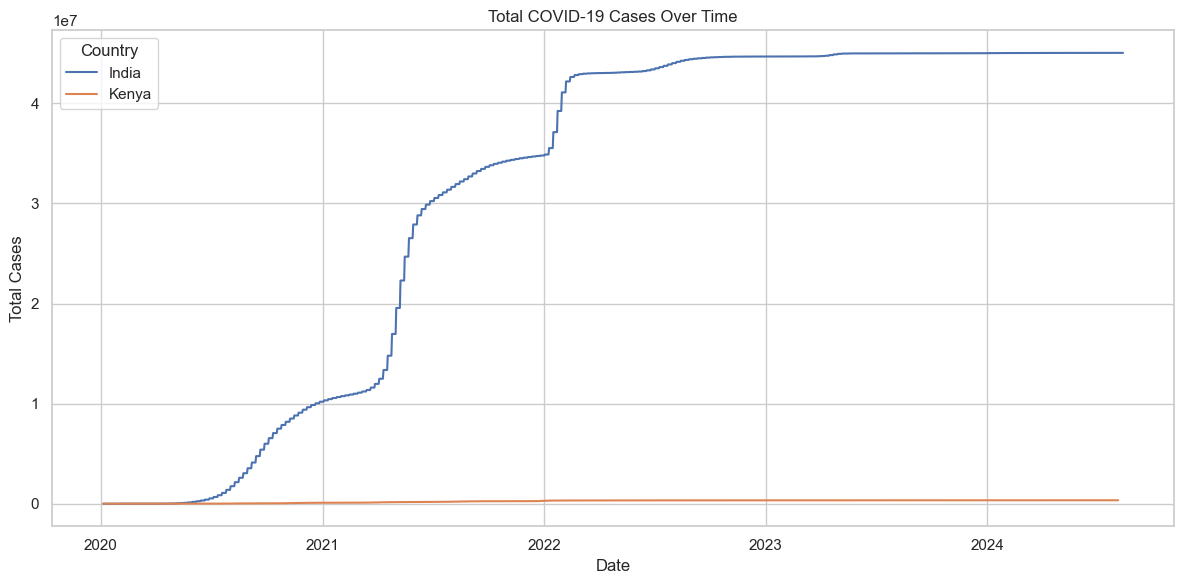

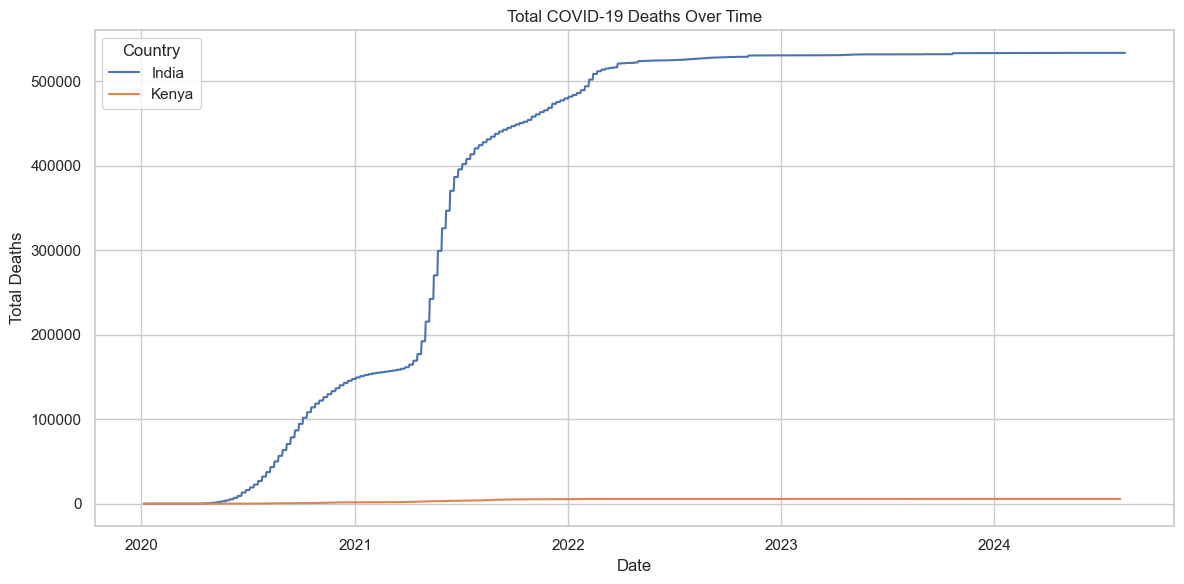

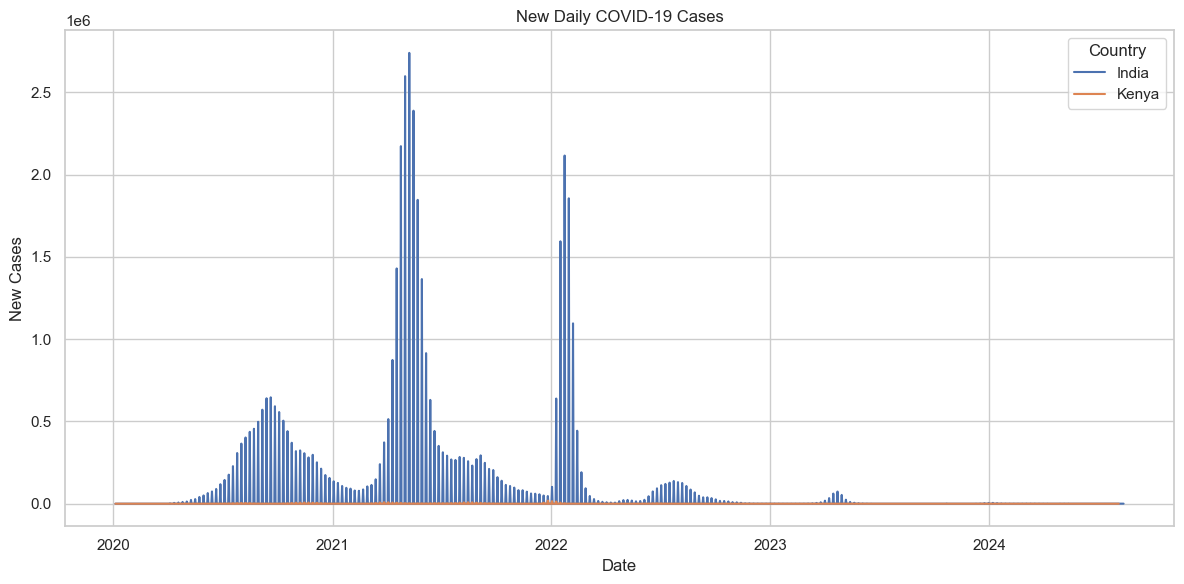

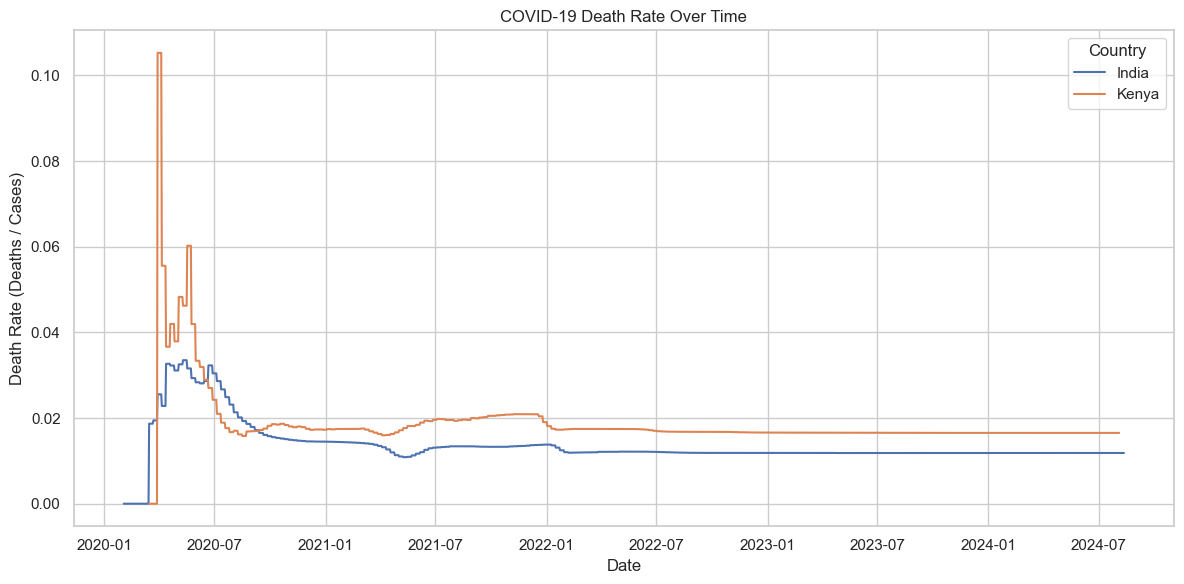

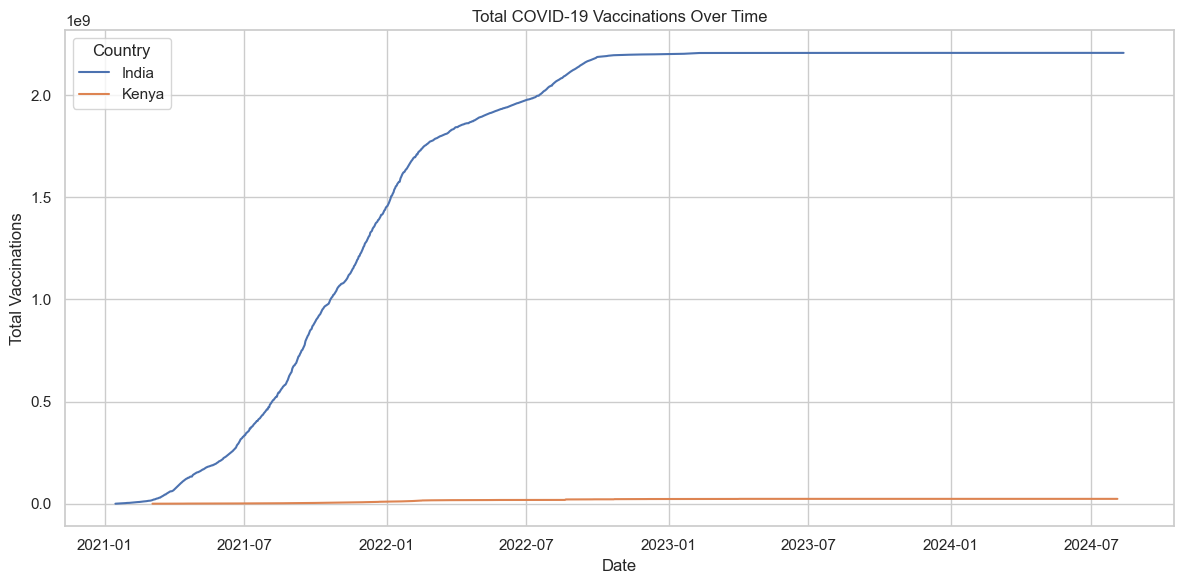

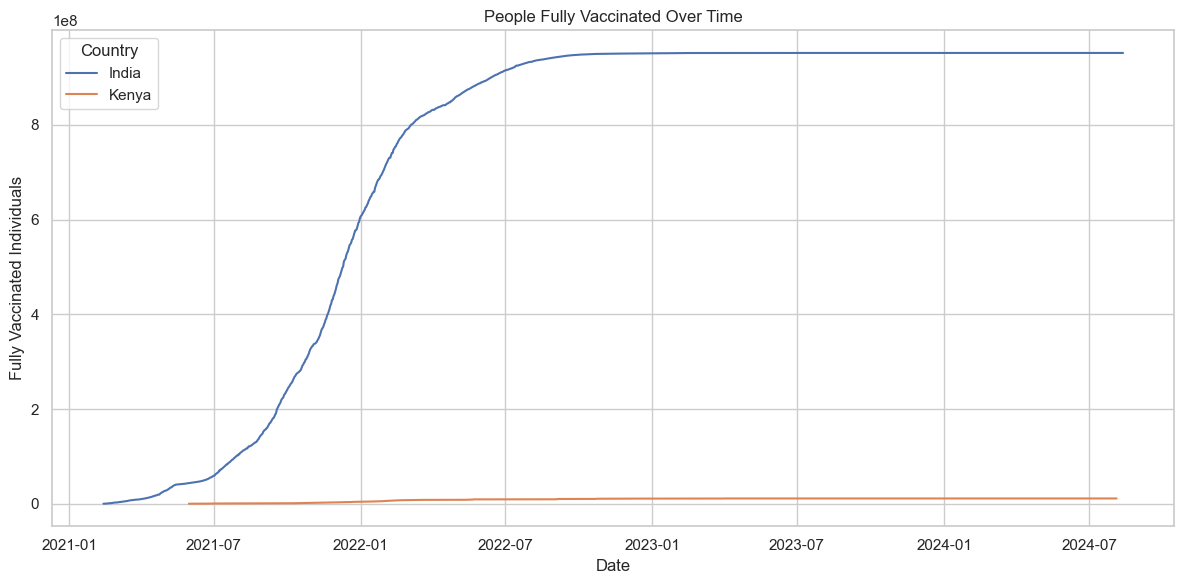

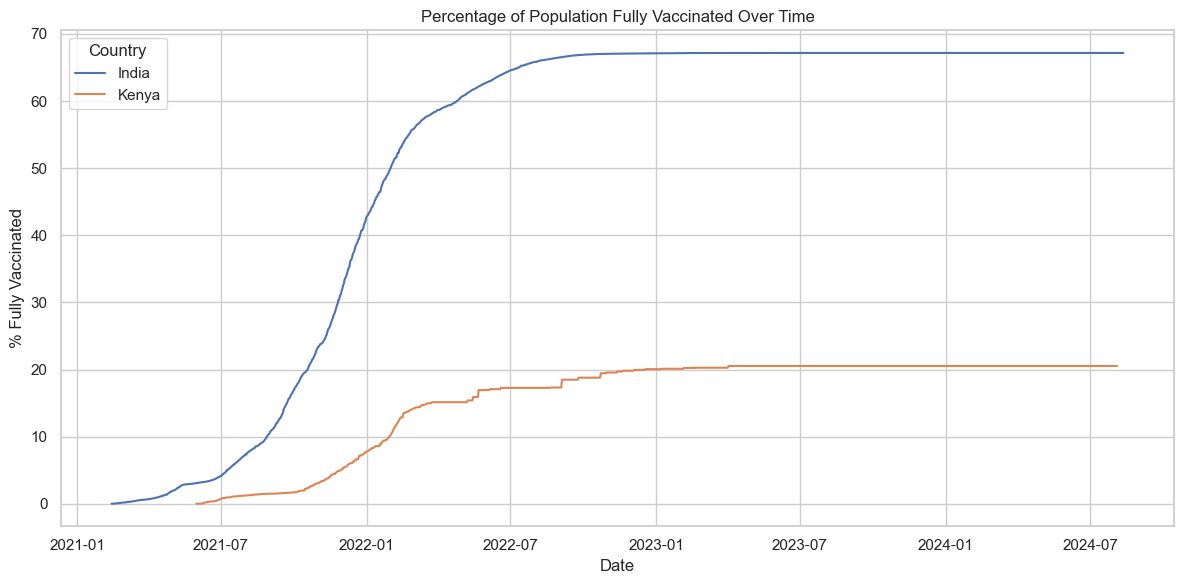

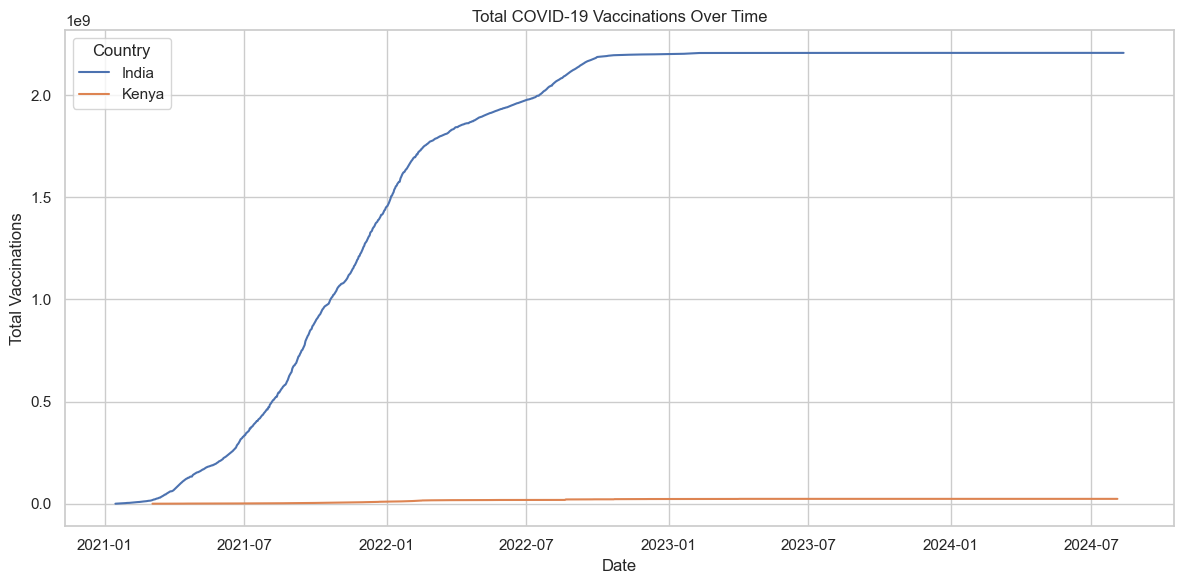

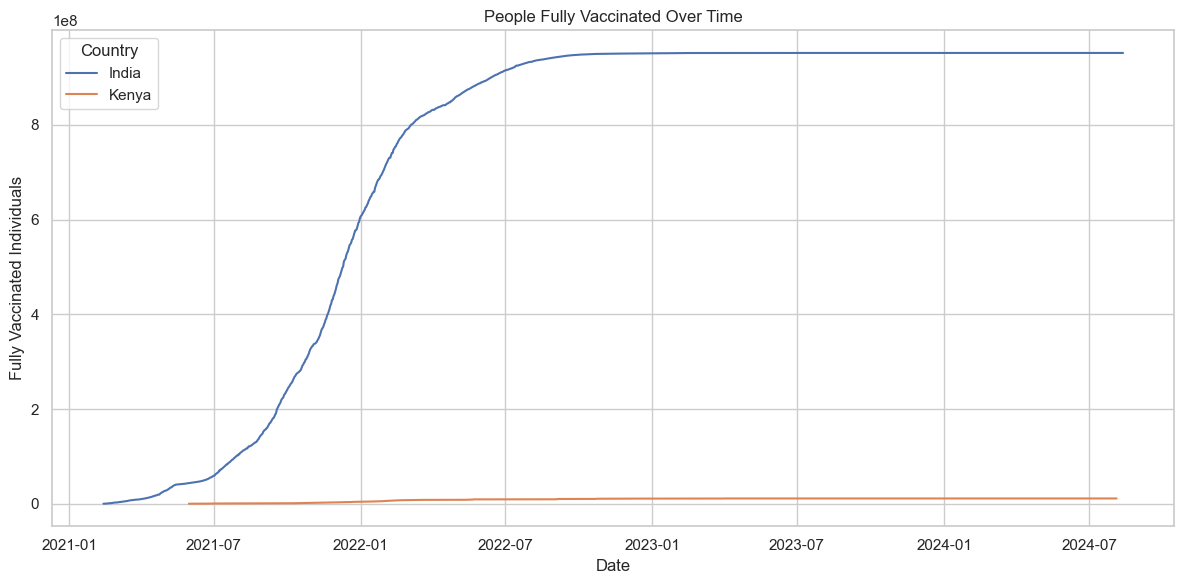

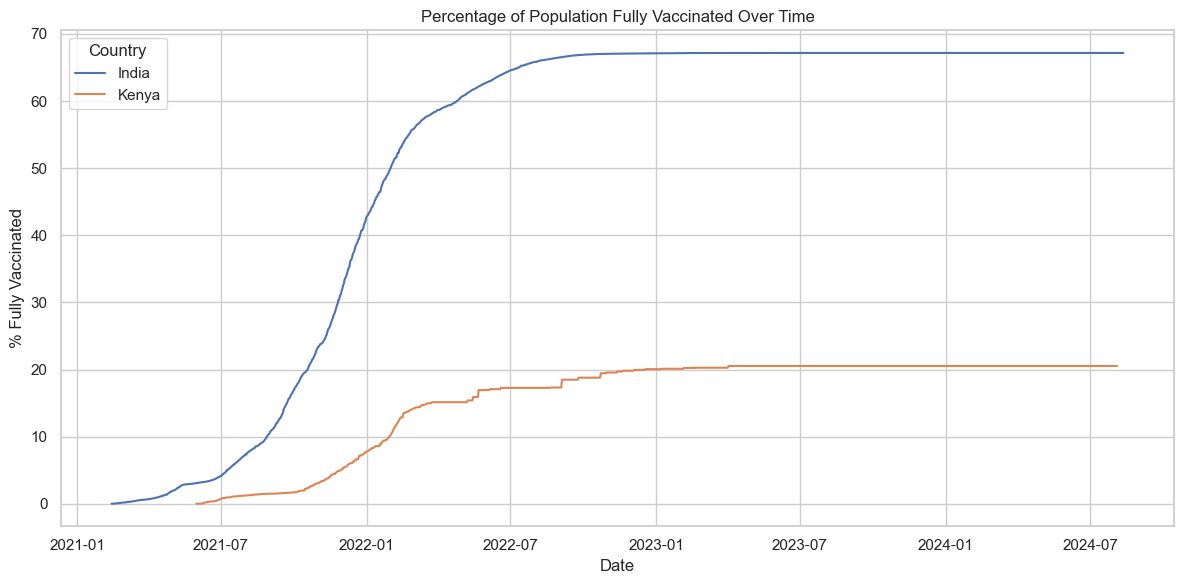

In [4]:
# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Add death rate column
df_cleaned["death_rate"] = df_cleaned["total_deaths"] / df_cleaned["total_cases"]

# Function to plot a metric over time by country
def plot_metric(metric, title, ylabel):
    plt.figure()
    sns.lineplot(data=df_cleaned, x="date", y=metric, hue="location")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

# Generate plots
plot_metric("total_cases", "Total COVID-19 Cases Over Time", "Total Cases")
plot_metric("total_deaths", "Total COVID-19 Deaths Over Time", "Total Deaths")
plot_metric("new_cases", "New Daily COVID-19 Cases", "New Cases")
plot_metric("death_rate", "COVID-19 Death Rate Over Time", "Death Rate (Deaths / Cases)")

# Plot total vaccinations over time
plot_metric("total_vaccinations", "Total COVID-19 Vaccinations Over Time", "Total Vaccinations")

# Plot people fully vaccinated over time
plot_metric("people_fully_vaccinated", "People Fully Vaccinated Over Time", "Fully Vaccinated Individuals")

# Prepare percentage fully vaccinated (if population is available)
# Merge population info per country
populations = df[df["location"].isin(countries_of_interest)][["location", "population"]].dropna().drop_duplicates("location")
df_vax = df_cleaned.merge(populations, on="location", how="left")

# Calculate % fully vaccinated
df_vax["pct_fully_vaccinated"] = (df_vax["people_fully_vaccinated"] / df_vax["population"]) * 100

# Plot % fully vaccinated over time
plt.figure()
sns.lineplot(data=df_vax, x="date", y="pct_fully_vaccinated", hue="location")
plt.title("Percentage of Population Fully Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("% Fully Vaccinated")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Total Vaccinations Over Time
sns.lineplot(data=df_cleaned, x="date", y="total_vaccinations", hue="location")
plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# People Fully Vaccinated Over Time
sns.lineplot(data=df_cleaned, x="date", y="people_fully_vaccinated", hue="location")
plt.title("People Fully Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("Fully Vaccinated Individuals")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Calculate % Fully Vaccinated (requires population)
populations = df[df["location"].isin(["Kenya", "United States", "India"])][["location", "population"]].dropna().drop_duplicates("location")
df_vax = df_cleaned.merge(populations, on="location", how="left")
df_vax["pct_fully_vaccinated"] = (df_vax["people_fully_vaccinated"] / df_vax["population"]) * 100

# % Population Fully Vaccinated Over Time
sns.lineplot(data=df_vax, x="date", y="pct_fully_vaccinated", hue="location")
plt.title("Percentage of Population Fully Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("% Fully Vaccinated")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Outputs:

#  Key Insights from COVID-19 Global Data Tracker (Kenya, USA, India)

### Overview
This section summarizes key insights from our analysis of COVID-19 trends, deaths, and vaccination progress across Kenya, the United States, and India.

---

### 1. 🇺🇸 The USA experienced the highest total case and death counts
- Multiple severe waves and sharp spikes in daily new cases.
- India's curve followed, particularly during the Delta wave.
- Kenya maintained a much flatter trajectory—possibly due to limited testing and reporting.

---

### 2. Vaccination rollout varied significantly
- **USA:** Rapid early deployment, wide booster coverage.
- **India:** Massive scale-up, slightly slower per capita progress.
- **Kenya:** Delayed rollout with lower full vaccination percentages.



### 3. Death rate declined over time
- Early high rates (low detection).
- Stabilized due to better treatment and testing.
- Impact of vaccinations likely reduced severe cases.

---

### 4. India had the most dramatic daily case spikes
- Especially during the Delta variant surge (mid-2021).
- Highlighted stress on health infrastructure in densely populated regions.



### 5. Incomplete vaccination data in Kenya
- Missing chunks in `people_fully_vaccinated` and related columns.
- Affects data reliability and cross-country comparability.